In [1]:
# 컨트롤 할 수 있게 수치해석 모듈인 numpy와 ~~ 다시

import numpy as np
import pandas as pd

In [2]:
# 데이터 읽어보기

!ls Applied-Deep-Learning-with-Keras/Lesson06

Activity11.ipynb  data		    Exercise17.ipynb
Activity12.ipynb  Exercise16.ipynb  Exercise18.ipynb


In [3]:
!ls Applied-Deep-Learning-with-Keras/Lesson06/data

Flu.csv  Health_Data.csv


In [4]:
!head Applied-Deep-Learning-with-Keras/Lesson06/data/Health_Data.csv

# !head는 리눅스 상에 명령어 사용

Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital,Readmitted
1,33,Urgent,Y,0,M,1,0,1,0
2,34,Emergency,N,0,M,1,0,22,0
3,88,Trauma,Y,1,M,1,1,100,1
4,56,Elective,Y,0,M,1,0,2,0
5,45,Trauma,Y,0,M,1,0,34,0
6,23,Elective,N,0,M,0,0,123,0
7,67,Elective,N,0,M,0,0,23,0
8,55,Elective,N,0,M,1,0,123,1
9,77,Trauma,N,0,F,1,0,44,0


In [5]:
patient_data = pd.read_csv("Applied-Deep-Learning-with-Keras/Lesson06/data/Health_Data.csv")

In [6]:
patient_data.head(30)

,Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital,Readmitted
0,1,33,Urgent,Y,0,M,1,0,1,0
1,2,34,Emergency,N,0,M,1,0,22,0
2,3,88,Trauma,Y,1,M,1,1,100,1
3,4,56,Elective,Y,0,M,1,0,2,0
4,5,45,Trauma,Y,0,M,1,0,34,0
5,6,23,Elective,N,0,M,0,0,123,0
6,7,67,Elective,N,0,M,0,0,23,0
7,8,55,Elective,N,0,M,1,0,123,1
8,9,77,Trauma,N,0,F,1,0,44,0
9,10,88,Emergency,N,0,M,1,0,3,1


In [7]:
# 정보에 대한 요약해보기
patient_data.describe()

# 환자 수 : 357명
# 나이 : 보통 40대 (평균) - 표준편차가 29인거 보면 10대도 있고 한 것!

# 평균 - 산술평균(일반적인 평균), 기하평균, 
# 평균을 해지는 것은 이상치들(outlier)!  -->  잘못된 결과를 초래할 수 있음.
# 현실에도 이상치 존재하기 때문에 평균 데이터만 믿으면 잘못된 결과 초래할 수 있음.

# 그래서 나타나게 된 것이 사분위수!! (평균의 또 다른 정의!)

# 평균 - 산술평균, 사분위수의 50%(중앙값), 최빈값


,Patient_id,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital,Readmitted
count,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,179.00000,42.574230,0.341737,0.596639,0.378151,43.182073,0.193277
std,103.20126,29.274624,0.474957,0.491261,0.485606,47.362609,0.395423
min,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,90.00000,14.000000,0.000000,0.000000,0.000000,12.000000,0.000000
50%,179.00000,35.000000,0.000000,1.000000,0.000000,32.000000,0.000000
75%,268.00000,67.000000,1.000000,1.000000,1.000000,55.000000,0.000000
max,357.00000,96.000000,1.000000,1.000000,1.000000,352.000000,1.000000


In [8]:
# 범주형자료도 정보를 확인해볼 수 있음.

patient_data.describe(include=['object'])

,Admission_type,PreExistingDisease,Gender
count,357,357,357
unique,5,2,2
top,Urgent,N,F
freq,131,228,186


In [9]:
patient_data.head()

,Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital,Readmitted
0,1,33,Urgent,Y,0,M,1,0,1,0
1,2,34,Emergency,N,0,M,1,0,22,0
2,3,88,Trauma,Y,1,M,1,1,100,1
3,4,56,Elective,Y,0,M,1,0,2,0
4,5,45,Trauma,Y,0,M,1,0,34,0


In [10]:
help(pd.get_dummies)

# 카테고리화할 수 있는 변수들을 더미/indicator 변수로 변화해준다.
# 카테고리화가 가능한 변수들의 빈도수를 체크해볼 수 있다.
# 인코딩할 때도 사용했었음!

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Colu

In [11]:
X = patient_data.iloc
print(X)

In [12]:
# 전체 데이터에서 1열만 출력
X = patient_data.iloc[:, 1]
print(X)

0      33
1      34
2      88
3      56
4      45
       ..
352    14
353    45
354    67
355    43
356     2
Name: Age, Length: 357, dtype: int64


In [13]:
X = patient_data.iloc[:, 1:9]
print(X)

     Age Admission_type PreExistingDisease  PreviousSurgery Gender  Smoker  \
0     33         Urgent                  Y                0      M       1   
1     34      Emergency                  N                0      M       1   
2     88         Trauma                  Y                1      M       1   
3     56       Elective                  Y                0      M       1   
4     45         Trauma                  Y                0      M       1   
..   ...            ...                ...              ...    ...     ...   
352   14         Trauma                  Y                1      M       1   
353   45         Trauma                  N                0      F       1   
354   67         Trauma                  N                1      M       1   
355   43         Trauma                  Y                1      M       0   
356    2         Trauma                  Y                1      F       0   

     Homeless  DaysinHospital  
0           0               1  

In [14]:
# 다시~~
# 재이건율?
y = patient_data.iloc[:, 9]
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
352    0
353    0
354    0
355    0
356    0
Name: Readmitted, Length: 357, dtype: int64


In [15]:
print(X.iloc[:, 1])

0         Urgent
1      Emergency
2         Trauma
3       Elective
4         Trauma
         ...    
352       Trauma
353       Trauma
354       Trauma
355       Trauma
356       Trauma
Name: Admission_type, Length: 357, dtype: object


In [16]:
SpecType = pd.get_dummies(X.iloc[:, 1], drop_first = True, prefix = 'SpecType')

In [17]:
# 인코딩해주기
# 긴급하지 않은 환자(Elective)를 제거하고 데이터가 분리되었음!

print(SpecType)

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent
0                     0                 0                0                1
1                     1                 0                0                0
2                     0                 0                1                0
3                     0                 0                0                0
4                     0                 0                1                0
..                  ...               ...              ...              ...
352                   0                 0                1                0
353                   0                 0                1                0
354                   0                 0                1                0
355                   0                 0                1                0
356                   0                 0                1                0

[357 rows x 4 columns]


In [18]:
PreDie = pd.get_dummies(X.iloc[:, 2], drop_first = True, prefix = 'PreDie')

In [19]:
# 이전에 질병없었던 환자들은 제거하고 출력함

print(PreDie)

     PreDie_Y
0           1
1           0
2           1
3           1
4           1
..        ...
352         1
353         0
354         0
355         1
356         1

[357 rows x 1 columns]


In [20]:
# 인코딩해줬던 원래 변수 제거하고,
# 별로 필요없을 것이라고 생각되는 성별 변수도 제거

X.drop(['Admission_type', 'PreExistingDisease', 'Gender'], axis = 1, inplace = True)
print(X)

# axis = 1
# inplace : 실제 메모리상에는 올라가있는데 데이터에도 적용해줘라.

     Age  PreviousSurgery  Smoker  Homeless  DaysinHospital
0     33                0       1         0               1
1     34                0       1         0              22
2     88                1       1         1             100
3     56                0       1         0               2
4     45                0       1         0              34
..   ...              ...     ...       ...             ...
352   14                1       1         1               2
353   45                0       1         1               2
354   67                1       1         1               2
355   43                1       0         1               2
356    2                1       0         1               2

[357 rows x 5 columns]


In [21]:
X = pd.concat(
    [X,SpecType, PreDie], axis = 1
)

In [22]:
print(X)

     Age  PreviousSurgery  Smoker  Homeless  DaysinHospital  \
0     33                0       1         0               1   
1     34                0       1         0              22   
2     88                1       1         1             100   
3     56                0       1         0               2   
4     45                0       1         0              34   
..   ...              ...     ...       ...             ...   
352   14                1       1         1               2   
353   45                0       1         1               2   
354   67                1       1         1               2   
355   43                1       0         1               2   
356    2                1       0         1               2   

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent  \
0                     0                 0                0                1   
1                     1                 0                0                0   
2     

In [23]:
# 데이터를 훈련시키고 test해보기

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1 # 재현율때문에 110했는데, 구지 ㅁ~~
)

# 이걸 돌릴때마다 재현율은 달라짐~!

In [26]:
print(X_train.shape)
print(y_train.shape)  # 일반 벡터형태로 나옴

(249, 10)
(249,)


In [27]:
print(X_test.shape)
print(y_test.shape)

(108, 10)
(108,)


In [28]:
print(108 / 357)
print(249 / 357)

0.3025210084033613
0.6974789915966386


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
print(X_train)

     Age  PreviousSurgery  Smoker  Homeless  DaysinHospital  \
62    23                1       1         0              56   
154    6                0       1         1              77   
185   44                0       0         0              74   
102   88                0       1         1               3   
207   91                0       1         1              99   
..   ...              ...     ...       ...             ...   
203   91                1       1         0              96   
255   35                1       1         1              25   
72    48                0       0         0              14   
235   91                0       1         1             123   
37    77                0       1         0              44   

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent  \
62                    0                 0                1                0   
154                   0                 0                0                1   
185   

In [31]:
# 다시
# 인코딩되어있는 데이터를 정규분포로 ~~

# Z 스코어 베이스의 scaling을 한 것!
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train)

[[-0.63137586  1.30633906  0.85391256 ...  1.94639707 -0.78541907
  -0.75891328]
 [-1.20477514 -0.76549805  0.85391256 ... -0.51376978  1.27320565
  -0.75891328]
 [ 0.07694089 -0.76549805 -1.17108009 ... -0.51376978 -0.78541907
  -0.75891328]
 ...
 [ 0.21185837 -0.76549805 -1.17108009 ... -0.51376978 -0.78541907
  -0.75891328]
 [ 1.66222125 -0.76549805  0.85391256 ... -0.51376978  1.27320565
   1.31767361]
 [ 1.19001008 -0.76549805  0.85391256 ... -0.51376978  1.27320565
  -0.75891328]]


In [32]:
X_train = pd.DataFrame(X_train, columns = X_test.columns)

print(X_train)


          Age  PreviousSurgery    Smoker  Homeless  DaysinHospital  \
0   -0.631376         1.306339  0.853913 -0.745822        0.288742   
1   -1.204775        -0.765498  0.853913  1.340803        0.739842   
2    0.076941        -0.765498 -1.171080 -0.745822        0.675399   
3    1.561033        -0.765498  0.853913  1.340803       -0.849748   
4    1.662221        -0.765498  0.853913  1.340803        1.212423   
..        ...              ...       ...       ...             ...   
244  1.662221         1.306339  0.853913 -0.745822        1.147980   
245 -0.226623         1.306339  0.853913  1.340803       -0.377168   
246  0.211858        -0.765498 -1.171080 -0.745822       -0.613458   
247  1.662221        -0.765498  0.853913  1.340803        1.727966   
248  1.190010        -0.765498  0.853913 -0.745822        0.030971   

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent  \
0             -0.341456         -0.295527         1.946397        -0.785419   
1

In [33]:
X_train.head()

,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital,SpecType_Emergency,SpecType_Newborn,SpecType_Trauma,SpecType_Urgent,PreDie_Y
0,-0.631376,1.306339,0.853913,-0.745822,0.288742,-0.341456,-0.295527,1.946397,-0.785419,-0.758913
1,-1.204775,-0.765498,0.853913,1.340803,0.739842,-0.341456,-0.295527,-0.513770,1.273206,-0.758913
2,0.076941,-0.765498,-1.171080,-0.745822,0.675399,2.928638,-0.295527,-0.513770,-0.785419,-0.758913
3,1.561033,-0.765498,0.853913,1.340803,-0.849748,-0.341456,-0.295527,1.946397,-0.785419,-0.758913
4,1.662221,-0.765498,0.853913,1.340803,1.212423,-0.341456,-0.295527,1.946397,-0.785419,1.317674


In [34]:
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X_train.columns)

In [35]:
# 설명 다시~
# numpy 버전으로 바꾸기
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

In [36]:
print(type(X_train_np))

# 수치해석 전용 다시~~
# 데이터 10만개 이하부터는 numpy가 느림.
# 데이터 10만개 이상부터는 numpy가 빨라짐.
# numpy는 수치연산하는 C++ 기반임

<class 'numpy.ndarray'>


In [37]:
print(X_train_np.shape)

(249, 10)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [39]:
model = Sequential()

In [40]:
model.add(
    Dense(
        # units 표현 안하고 숫자만 넣어도 됨 (원래는 그냥 숫자만 넣었음)
        units = 6, activation = 'relu',
        kernel_initializer = 'uniform',
        input_dim = 10
    )
)

model.add(Dropout(rate = 0.3))

In [41]:
model.add(
    Dense(
        units = 6, activation = 'relu',
        kernel_initializer = 'uniform',
    )
)

In [42]:
model.add(
    Dense(
        units = 12, activation = 'tanh',
        kernel_initializer = 'uniform',
    )
)

In [43]:
model.add(
    Dense(
        units = 6, activation = 'tanh',
        kernel_initializer = 'uniform',
    )
)

In [44]:
model.add(
    Dense(
        units = 1, activation = 'sigmoid',
        kernel_initializer = 'uniform',
    )
)

In [45]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [46]:
model.fit(
    X_train_np, y_train_np, 
    epochs = 200, 
    # 계산할 때 몇개 단위로 계산할 것인가
    batch_size = 20
)

Epoch 1/200
13/13 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.8072
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.8072
Epoch 3/200
13/13 [==============================] - 0s 607us/step - loss: 0.6781 - accuracy: 0.8072
Epoch 4/200
13/13 [==============================] - 0s 591us/step - loss: 0.6669 - accuracy: 0.8072
Epoch 5/200
13/13 [==============================] - 0s 586us/step - loss: 0.6503 - accuracy: 0.8072
Epoch 6/200
13/13 [==============================] - 0s 588us/step - loss: 0.6241 - accuracy: 0.8072
Epoch 7/200
13/13 [==============================] - 0s 608us/step - loss: 0.5883 - accuracy: 0.8072
Epoch 8/200
13/13 [==============================] - 0s 554us/step - loss: 0.5472 - accuracy: 0.8072
Epoch 9/200
13/13 [==============================] - 0s 594us/step - loss: 0.5124 - accuracy: 0.8072
Epoch 10/200
13/13 [==============================] - 0s 554us/step - loss: 0.4818 - accuracy: 

13/13 [==============================] - 0s 618us/step - loss: 0.2641 - accuracy: 0.9036
Epoch 82/200
13/13 [==============================] - 0s 517us/step - loss: 0.2458 - accuracy: 0.9157
Epoch 83/200
13/13 [==============================] - 0s 568us/step - loss: 0.2353 - accuracy: 0.9197
Epoch 84/200
13/13 [==============================] - 0s 543us/step - loss: 0.2329 - accuracy: 0.9197
Epoch 85/200
13/13 [==============================] - 0s 605us/step - loss: 0.2466 - accuracy: 0.9157
Epoch 86/200
13/13 [==============================] - 0s 547us/step - loss: 0.2302 - accuracy: 0.9197
Epoch 87/200
13/13 [==============================] - 0s 618us/step - loss: 0.2544 - accuracy: 0.9036
Epoch 88/200
13/13 [==============================] - 0s 561us/step - loss: 0.2422 - accuracy: 0.9116
Epoch 89/200
13/13 [==============================] - 0s 519us/step - loss: 0.2244 - accuracy: 0.9157
Epoch 90/200
13/13 [==============================] - 0s 538us/step - loss: 0.2543 - accuracy: 

13/13 [==============================] - 0s 621us/step - loss: 0.2131 - accuracy: 0.9398
Epoch 161/200
13/13 [==============================] - 0s 619us/step - loss: 0.2246 - accuracy: 0.9317
Epoch 162/200
13/13 [==============================] - 0s 643us/step - loss: 0.2192 - accuracy: 0.9438
Epoch 163/200
13/13 [==============================] - 0s 575us/step - loss: 0.2313 - accuracy: 0.9277
Epoch 164/200
13/13 [==============================] - 0s 674us/step - loss: 0.2132 - accuracy: 0.9438
Epoch 165/200
13/13 [==============================] - 0s 609us/step - loss: 0.2341 - accuracy: 0.9237
Epoch 166/200
13/13 [==============================] - 0s 572us/step - loss: 0.2373 - accuracy: 0.9277
Epoch 167/200
13/13 [==============================] - 0s 586us/step - loss: 0.2142 - accuracy: 0.9357
Epoch 168/200
13/13 [==============================] - 0s 565us/step - loss: 0.2224 - accuracy: 0.9357
Epoch 169/200
13/13 [==============================] - 0s 618us/step - loss: 0.2229 - a

In [47]:
model.fit(
    X_train_np, y_train_np, 
    epochs = 400, 
    batch_size = 20
)

Epoch 1/400
13/13 [==============================] - 0s 580us/step - loss: 0.2186 - accuracy: 0.9317
Epoch 2/400
13/13 [==============================] - 0s 587us/step - loss: 0.2277 - accuracy: 0.9277
Epoch 3/400
13/13 [==============================] - 0s 601us/step - loss: 0.2156 - accuracy: 0.9357
Epoch 4/400
13/13 [==============================] - 0s 573us/step - loss: 0.2219 - accuracy: 0.9317
Epoch 5/400
13/13 [==============================] - 0s 642us/step - loss: 0.2144 - accuracy: 0.9277
Epoch 6/400
13/13 [==============================] - 0s 519us/step - loss: 0.2111 - accuracy: 0.9398
Epoch 7/400
13/13 [==============================] - 0s 521us/step - loss: 0.2083 - accuracy: 0.9398
Epoch 8/400
13/13 [==============================] - 0s 565us/step - loss: 0.2115 - accuracy: 0.9317
Epoch 9/400
13/13 [==============================] - 0s 595us/step - loss: 0.2101 - accuracy: 0.9357
Epoch 10/400
13/13 [==============================] - 0s 637us/step - loss: 0.1967 - accura

13/13 [==============================] - 0s 608us/step - loss: 0.2106 - accuracy: 0.9277
Epoch 82/400
13/13 [==============================] - 0s 565us/step - loss: 0.2122 - accuracy: 0.9357
Epoch 83/400
13/13 [==============================] - 0s 666us/step - loss: 0.2062 - accuracy: 0.9398
Epoch 84/400
13/13 [==============================] - 0s 610us/step - loss: 0.1999 - accuracy: 0.9438
Epoch 85/400
13/13 [==============================] - 0s 581us/step - loss: 0.2140 - accuracy: 0.9277
Epoch 86/400
13/13 [==============================] - 0s 593us/step - loss: 0.2041 - accuracy: 0.9357
Epoch 87/400
13/13 [==============================] - 0s 582us/step - loss: 0.2028 - accuracy: 0.9357
Epoch 88/400
13/13 [==============================] - 0s 700us/step - loss: 0.2112 - accuracy: 0.9398
Epoch 89/400
13/13 [==============================] - 0s 665us/step - loss: 0.2146 - accuracy: 0.9277
Epoch 90/400
13/13 [==============================] - 0s 614us/step - loss: 0.2005 - accuracy: 

13/13 [==============================] - 0s 670us/step - loss: 0.2135 - accuracy: 0.9317
Epoch 161/400
13/13 [==============================] - 0s 579us/step - loss: 0.2151 - accuracy: 0.9317
Epoch 162/400
13/13 [==============================] - 0s 551us/step - loss: 0.2093 - accuracy: 0.9317
Epoch 163/400
13/13 [==============================] - 0s 544us/step - loss: 0.2028 - accuracy: 0.9317
Epoch 164/400
13/13 [==============================] - 0s 543us/step - loss: 0.2075 - accuracy: 0.9398
Epoch 165/400
13/13 [==============================] - 0s 533us/step - loss: 0.1972 - accuracy: 0.9317
Epoch 166/400
13/13 [==============================] - 0s 575us/step - loss: 0.2208 - accuracy: 0.9277
Epoch 167/400
13/13 [==============================] - 0s 548us/step - loss: 0.2055 - accuracy: 0.9438
Epoch 168/400
13/13 [==============================] - 0s 533us/step - loss: 0.2040 - accuracy: 0.9398
Epoch 169/400
13/13 [==============================] - 0s 536us/step - loss: 0.2220 - a

13/13 [==============================] - 0s 597us/step - loss: 0.1966 - accuracy: 0.9357
Epoch 240/400
13/13 [==============================] - 0s 545us/step - loss: 0.2283 - accuracy: 0.9237
Epoch 241/400
13/13 [==============================] - 0s 548us/step - loss: 0.2195 - accuracy: 0.9277
Epoch 242/400
13/13 [==============================] - 0s 765us/step - loss: 0.2177 - accuracy: 0.9277
Epoch 243/400
13/13 [==============================] - 0s 562us/step - loss: 0.2032 - accuracy: 0.9357
Epoch 244/400
13/13 [==============================] - 0s 560us/step - loss: 0.2130 - accuracy: 0.9357
Epoch 245/400
13/13 [==============================] - 0s 627us/step - loss: 0.2135 - accuracy: 0.9237
Epoch 246/400
13/13 [==============================] - 0s 544us/step - loss: 0.2026 - accuracy: 0.9398
Epoch 247/400
13/13 [==============================] - 0s 829us/step - loss: 0.2199 - accuracy: 0.9277
Epoch 248/400
13/13 [==============================] - 0s 560us/step - loss: 0.2057 - a

13/13 [==============================] - 0s 558us/step - loss: 0.2099 - accuracy: 0.9317
Epoch 319/400
13/13 [==============================] - 0s 575us/step - loss: 0.2286 - accuracy: 0.9277
Epoch 320/400
13/13 [==============================] - 0s 568us/step - loss: 0.2065 - accuracy: 0.9317
Epoch 321/400
13/13 [==============================] - 0s 542us/step - loss: 0.1891 - accuracy: 0.9438
Epoch 322/400
13/13 [==============================] - 0s 617us/step - loss: 0.2255 - accuracy: 0.9277
Epoch 323/400
13/13 [==============================] - 0s 621us/step - loss: 0.2059 - accuracy: 0.9438
Epoch 324/400
13/13 [==============================] - 0s 535us/step - loss: 0.1945 - accuracy: 0.9438
Epoch 325/400
13/13 [==============================] - 0s 589us/step - loss: 0.2012 - accuracy: 0.9398
Epoch 326/400
13/13 [==============================] - 0s 537us/step - loss: 0.1984 - accuracy: 0.9398
Epoch 327/400
13/13 [==============================] - 0s 660us/step - loss: 0.2096 - a

13/13 [==============================] - 0s 618us/step - loss: 0.2059 - accuracy: 0.9398
Epoch 398/400
13/13 [==============================] - 0s 603us/step - loss: 0.2231 - accuracy: 0.9197
Epoch 399/400
13/13 [==============================] - 0s 562us/step - loss: 0.2098 - accuracy: 0.9357
Epoch 400/400
13/13 [==============================] - 0s 591us/step - loss: 0.2167 - accuracy: 0.9357


In [48]:
y_pred_class = model.predict(X_test_np)
y_pred_prob = model.predict_proba(X_test_np)

Instructions for updating:
Please use `model.predict()` instead.


In [49]:
print(y_pred_class)

[[0.03579488]
 [0.929633  ]
 [0.03579488]
 [0.03579491]
 [0.929633  ]
 [0.03579488]
 [0.929633  ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.0359793 ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.6670759 ]
 [0.03579488]
 [0.03579488]
 [0.03607818]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.7188402 ]
 [0.03579488]
 [0.04161742]
 [0.03579488]
 [0.9198317 ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.0358299 ]
 [0.03579488]
 [0.03579506]
 [0.03579488]
 [0.03579494]
 [0.03579488]
 [0.03579488]
 [0.0357956 ]
 [0.929633  ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579542]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.929633  ]
 [0.03579488]
 [0.03579488]
 [0.6670759 ]
 [0.8641771 ]
 [0.03579488]
 [0.03579488]
 [0.929633  ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579566]
 [0.06505603]
 [0.03579488]
 [0.03579488]
 [0.03579485]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.54

In [50]:
print(y_pred_prob)

# 별 차이 없음
# 지금은 pred가 자동으로 정규화 해주고 있기 때문에!!

[[0.03579488]
 [0.929633  ]
 [0.03579488]
 [0.03579491]
 [0.929633  ]
 [0.03579488]
 [0.929633  ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.0359793 ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.6670759 ]
 [0.03579488]
 [0.03579488]
 [0.03607818]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.7188402 ]
 [0.03579488]
 [0.04161742]
 [0.03579488]
 [0.9198317 ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.0358299 ]
 [0.03579488]
 [0.03579506]
 [0.03579488]
 [0.03579494]
 [0.03579488]
 [0.03579488]
 [0.0357956 ]
 [0.929633  ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579542]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.929633  ]
 [0.03579488]
 [0.03579488]
 [0.6670759 ]
 [0.8641771 ]
 [0.03579488]
 [0.03579488]
 [0.929633  ]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579566]
 [0.06505603]
 [0.03579488]
 [0.03579488]
 [0.03579485]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.03579488]
 [0.54

In [51]:
# 5개 데이터만 확인하기

y_pred_class[:5]

array([[0.03579488],
       [0.929633  ],
       [0.03579488],
       [0.03579491],
       [0.929633  ]], dtype=float32)

In [52]:
y_pred_class = y_pred_class > 0.5
print(y_pred_class)

# 결론적으로,
# 독립변수들 베이스로 y값을 재입원할 것이다 안할 것이다를 확인한 것.
# 이런 식으로 고객관리를 하면 좋음! 

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [53]:
print(y_pred_class.astype(int)[:5])

[[0]
 [1]
 [0]
 [0]
 [1]]


In [54]:
from sklearn.metrics import accuracy_score

In [61]:
res = accuracy_score(y_test_np, y_pred_class)

print(res)

0.8148148148148148


In [56]:
## 비교 분석해보기

In [57]:
print(type(y_test))

# 판다스 형태로 유지되어있음을 확인

<class 'pandas.core.series.Series'>


In [58]:
y_test.value_counts()

0    87
1    21
Name: Readmitted, dtype: int64

In [62]:
print(87 / 108)
print(21 / 108)

0.8055555555555556
0.19444444444444445


In [59]:
y_test.value_counts().head(1) / len(y_test)

0    0.805556
Name: Readmitted, dtype: float64

In [63]:
from sklearn.metrics import roc_curve

In [64]:
# fpr(거짓 양성률) : 실제로는 해당사항이 없지만 해당사항이 있다고 판정을 내리는 경우
# thresholds는 임계치 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [65]:
print(fpr)

[0.         0.02298851 0.02298851 0.03448276 0.03448276 0.10344828
 0.16091954 0.16091954 0.20689655 0.20689655 0.2183908  0.2183908
 0.26436782 0.28735632 0.31034483 0.33333333 0.98850575 1.        ]


In [66]:
print(tpr)

[0.         0.33333333 0.38095238 0.38095238 0.47619048 0.52380952
 0.52380952 0.57142857 0.57142857 0.61904762 0.61904762 0.66666667
 0.66666667 0.66666667 0.71428571 0.71428571 1.         1.        ]


In [67]:
print(thresholds)

[1.929633   0.929633   0.9198317  0.9173447  0.7188402  0.6670759
 0.04161742 0.03706498 0.0358299  0.03582945 0.03580153 0.03579566
 0.03579506 0.03579494 0.03579491 0.0357949  0.03579488 0.03579485]


In [68]:
import matplotlib.pyplot as plt

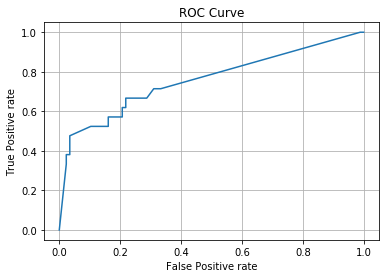

In [69]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.grid(True)
plt.show()

# 민감도가 0.4까지는 좋다가 점점 좋지 않아짐. (기울기가 원만해지니까)
# 오판율이 점점 높아지고 있음.
# 

In [70]:
# AUC 점수 확인해보기
def optimum_threshold(my_threshold):
    print("Sensitivity:", tpr[thresholds > my_threshold][-1])
    print("Specificity:", 1-fpr[thresholds > my_threshold][-1])
    
# thresholds > my_threshold
# my_threshold는 내가 정한 임계치

In [73]:
print(tpr[thresholds > 0.5])

[0.         0.33333333 0.38095238 0.38095238 0.47619048 0.52380952]


In [74]:
print(tpr[thresholds > 0.5][-1])

# 맨뒤에 값이 무엇인지 출력하라!

0.5238095238095238


In [75]:
optimum_threshold(0.3)

Sensitivity: 0.5238095238095238
Specificity: 0.896551724137931


In [76]:
optimum_threshold(0.5)

# 특이도가 꽤 높아짐.
# 

Sensitivity: 0.5238095238095238
Specificity: 0.896551724137931


In [77]:
print(tpr[thresholds > 0.3])

[0.         0.33333333 0.38095238 0.38095238 0.47619048 0.52380952]


In [78]:
print(tpr[thresholds > 0.5])

[0.         0.33333333 0.38095238 0.38095238 0.47619048 0.52380952]


In [79]:
optimum_threshold(0.01)
# 임계치가 낮으니까 민감도
# 임계치가 작다보니 많은 사람한테 적용은 못함

# 민감도 1이니까 참인 케이스는 기가막히게 잡아내는데 아닌 경우는 알 수 없다.

Sensitivity: 1.0
Specificity: 0.0


In [80]:
from sklearn.metrics import roc_auc_score

In [81]:
roc_auc_score(y_test, y_pred_prob)

0.7575259989053093